[**2. Supervised learning**](#sl) <br>

[2.1 Introduction](#intro)<br>
[**2.2 Regression**](#regr) <br>
[**2.3 Classification**](#class) <br>

&nbsp; &nbsp;  [Naive Bayes](#NB) <br>
&nbsp; &nbsp;  [K nearest neighbors (kNN)](#kNN) <br>
&nbsp; &nbsp;  [Decision Trees for classification](#tree) <br>
&nbsp; &nbsp;  [SDGClassifier](#SDG) <br>
&nbsp; &nbsp;  [Note: Scoring a classification model](#score) <br>
&nbsp; &nbsp;  [SVM](#SVM) <br>


## 2.3 Classification <a name="class"></a>
<img style='vertical-align:middle;' src="figures/iris.png" width="1000">

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)

n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
print(iris.data[0])
print(iris.target.shape)
print(iris.target)
print(iris.target_names)

(150, 4)
150
4
[5.1 3.5 1.4 0.2]
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [11]:
import numpy as np 
print(iris.feature_names)
np.unique(iris.target, return_counts=True)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(array([0, 1, 2]), array([50, 50, 50]))

In [12]:
iris.data[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

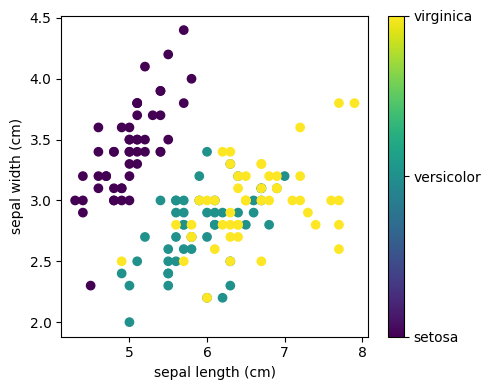

In [13]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Naive Bayes <a name="NB"></a>
Applys Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 


Bayes’ theorem states the following relationship, given class variable $y$
 and dependent feature vector $(x_1,...,x_n)$:
 
 $P(y|x_1,...,x_n)=\frac{P(y)P(x1,...,x_n|y)}{P(x_1,...,x_n)}$
 
Using the naive conditional independence assumption that <span style="color:red">$P(x_i|y,x_1,...x_{i-1},x_{i+1},...x_n)=P(x_i|y)$</span>
for all $i$, this relationship is simplified to:

$P(y|x_1,...,x_n)=\frac{P(y) \Pi_{i=1}^n P(x_i|y)}{P(x_1,...,x_n)} \propto P(y) \Pi_{i=1}^n P(x_i|y)$

where the proportionality derives from the observation that $P(x_1,...,x_n)$ is constant given the input.

and we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i|y)$; the former is then the relative frequency of class $y$ in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of 
$P(x_i|y)$.

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. 

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

$P(x_i|y)={\frac {1}{\sqrt {2\pi \sigma _{y}^{2}}}}\,e^{-{\frac {(x_i-\mu _{y})^{2}}{2\sigma _{y}^{2}}}}$
The parameters  $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.



In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(f'Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}')

Number of mislabeled points out of a total 75 points : 4


### K nearest neighbors (kNN) <a name="kNN"></a>

KNN is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. Let’s try it out on our iris classification problem with two neighbors:


(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

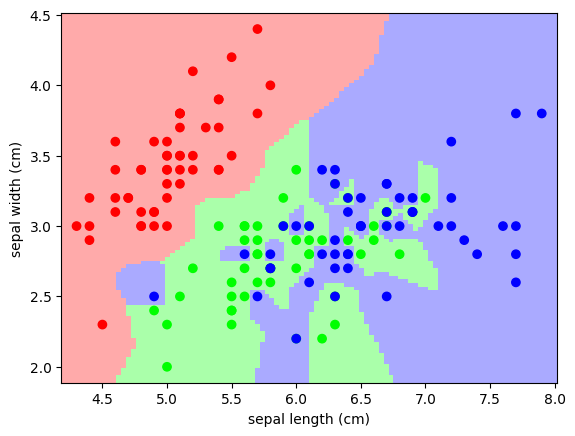

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

Now redo with 100 neighbors

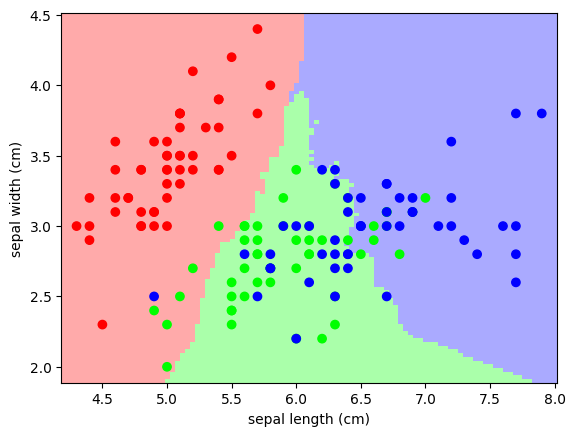

In [16]:
knn = neighbors.KNeighborsClassifier(n_neighbors=100)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

### Decision Trees for classification <a name="tree"></a>

the loss can be:
* Gini $L(D_m)=\sum_k p_{mk}(1-p_{mk})$
* (slower than Gini) logloss or entropy or logistic loss or multinomial deviance or the negative log likelihood of a logistic model that return y_pred for y_true $L(D_m)=\sum_k p_{mk} log(p_{mk}$
* misclassification rate



--------
For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

We also show the tree structure of a model built on all of the features.

First load the copy of the Iris dataset shipped with scikit-learn:
    

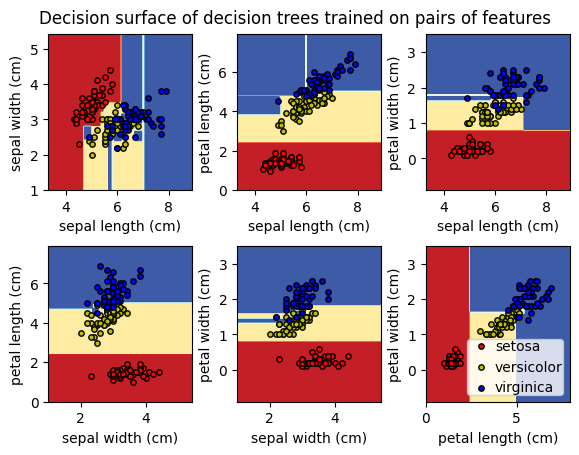

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Display the structure of a single decision tree trained on all the features together.

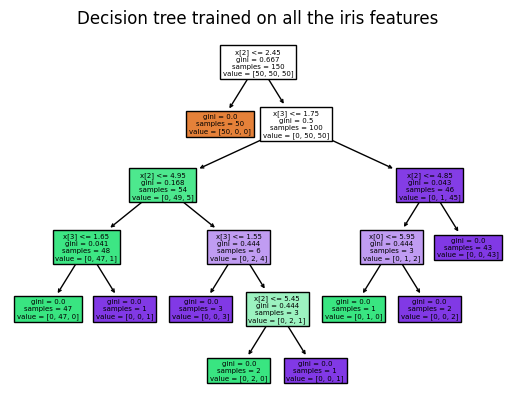

In [18]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

The tree_.value array is a 3D array of shape [n_nodes, n_classes, n_outputs] which provides the proportion of samples reaching a node for each class and for each output. Each node has a value array which is the proportion of weighted samples reaching this node for each output and class with respect to the parent node.

##### Tips on practical use
* Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

* Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.

* Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.

* Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.

* Use min_samples_split or min_samples_leaf to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try min_samples_leaf=5 as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. While min_samples_split can create arbitrarily small leaves, min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems. For classification with few classes, min_samples_leaf=1 is often the best choice.
    Note that min_samples_split considers samples directly and independent of sample_weight, if provided (e.g. a node with m weighted samples is still treated as having exactly m samples). Consider min_weight_fraction_leaf or min_impurity_decrease if accounting for sample weights is required at splits.
    * min_samples_split: The minimum number of samples required to split an internal node

    * min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

    While min_samples_split can create arbitrarily small leaves, min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems.

### SDGClassifier <a name="SDG"></a>

SDGClassifier for Linear classifiers: SVM, logistic regression, etc. with SGD training.

The gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing learning rate. SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the **data should have zero mean and unit variance** (features should be standardized using e.g. make_pipeline(StandardScaler(), SGDClassifier()).

The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM): **loss** $\in$ {‘hinge’, ‘log_loss’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’hinge’

**penalty** $\in$ {‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’ The Elastic Net solves some deficiencies of the L1 penalty in the presence of highly correlated attributes.

**alpha** float, default=0.0001 Constant that multiplies the regularization term

**l1_ratio** float, default=0.15 The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty is ‘elasticnet’. Values must be in the range [0.0, 1.0].

**n_jobs** int, default=None The number of CPUs to use to do the OVA (One Versus All, for multi-class problems) computation. None means 1 unless in a joblib.parallel_backend context. *-1* means using all processors.

**random_state** int, RandomState instance, default=None Used for shuffling the data, when shuffle is set to True. Pass an int for reproducible output across multiple function calls


SGDClassifier supports **multi-class classification** by combining multiple binary classifiers in a **“one versus all” (OVA)** scheme. 

For each of the classes, a binary classifier is learned that discriminates between that and all other classes. At testing time, we compute the confidence score (i.e. the signed distances to the hyperplane) for each classifier and choose the class with the highest confidence. The Figure below illustrates the OVA approach on the iris dataset. The dashed lines represent the three OVA classifiers; the background colors show the decision surface induced by the three classifiers.

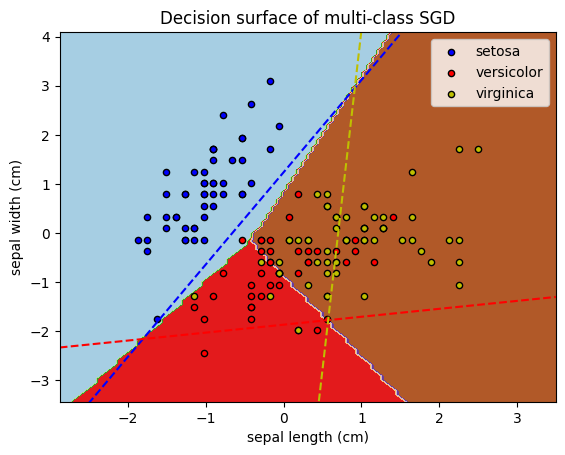

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

### Note: Scoring a classification model <a name="score"></a>
<img style='vertical-align:middle;' src="figures/score_1.png" width="1000">
<img style='vertical-align:middle;' src="figures/score_2.png" width="1000">


### SVM  <a name="SVM"></a>
<img style='vertical-align:middle;' src="figures/SVM.png" width="1000">
<img style='vertical-align:middle;' src="figures/kernel.png" width="1000">
